In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
old = pd.read_csv("regression_data.csv")
old.head()

,7129300520,10/13/14,3,1,1180,5650,1.1,0,0.1,3.1,7,1180.1,0.2,1955,0.3,98178,47.5112,-122.257,1340,5650.1,221900
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


In [3]:
# 

In [4]:
reg = pd.read_csv("regression_data.csv", names = ["id", "date", "bedrooms", "bathrooms", "sqft_living", 
                                                 "sqft_lot", "floors", "waterfront", "view","condition",
                                                 "grade", "sqft_above", "sqft_basement", "yr_built", 
                                                 "yr_renovated", "zipcode","lat","long","sqft_living15",
                                                 "sqft_lot15", "price"], header = None)
reg.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
reg.shape

(21597, 21)

In [6]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [7]:
reg.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
reg = reg.drop(["id","lat","long"], axis=1)
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


In [9]:
reg["date"] = pd.to_datetime(reg["date"], format='%m/%d/%y')

In [10]:
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


In [11]:
reg['year'] = reg['date'].dt.year
reg['month'] = reg['date'].dt.month
reg['day'] = reg['date'].dt.day
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [12]:
reg = reg.drop(["date"], axis=1)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [13]:
reg.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,1986.620318,12758.283512,5.402966e+05,2014.322962,6.573969,15.687457
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,685.230472,27274.441950,3.673681e+05,0.467619,3.115061,8.634890
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,7.800000e+04,2014.000000,1.000000,1.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,3.220000e+05,2014.000000,4.000000,8.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,4.500000e+05,2014.000000,6.000000,16.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,6.450000e+05,2015.000000,9.000000,23.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,7.700000e+06,2015.000000,12.000000,31.000000


In [14]:
# fazer bucketing 1, 2-3 , 4-5,  >= 6
reg["bedrooms"].value_counts()


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [15]:
reg["bathrooms"] = reg["bathrooms"].astype(int)
reg["floors"] = reg["floors"].astype(int)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13


In [16]:
# sqft of the house , transform in square meter
reg["sqft_living"].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [17]:
reg['sqm2_living'] = round(reg['sqft_living'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6


In [18]:
# sqft of the lot
reg["sqft_lot"].value_counts()

5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: sqft_lot, Length: 9776, dtype: int64

In [19]:
reg['sqm2_lot'] = round(reg['sqft_lot'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9


In [20]:
reg["floors"].value_counts()

1    12583
2     8396
3      618
Name: floors, dtype: int64

In [21]:
reg["waterfront"].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [22]:
# views 
reg["view"].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [23]:
# bucket in viewed or not viewed

def viewed_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [24]:
reg['viewed_or_not'] = reg['view'].apply(viewed_or_not)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0


In [25]:
reg["viewed_or_not"].value_counts()

0    19475
1     2122
Name: viewed_or_not, dtype: int64

In [26]:
reg["condition"].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [27]:
reg["grade"].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [28]:
reg["sqft_above"].value_counts()
#sqft apart from basement

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: sqft_above, Length: 942, dtype: int64

In [29]:
reg['sqm2_above'] = round(reg['sqft_above'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6


In [30]:
reg["sqft_basement"].value_counts()
# sqftge basement

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [31]:
reg['sqm2_basement'] = round(reg['sqft_basement'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0


In [32]:
reg["yr_built"].value_counts()
# 0-30 , 30-60, 60-90 , > 90 , categorica ordinal!!

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [33]:
reg["age"] = 2023 - reg["yr_built"]
reg["age"].value_counts()

9      559
17     453
18     450
19     433
20     420
      ... 
90      30
122     29
121     27
88      24
89      21
Name: age, Length: 116, dtype: int64

In [34]:
reg["yr_renovated"].value_counts()
# renovaçao sim/não

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [35]:
# group - renovated or not

def ren_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [36]:
reg['ren_or_not'] = reg['yr_renovated'].apply(ren_or_not)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0,68,0


In [37]:
reg["zipcode"].value_counts()
# ver os zipcodes - ricos  ---> ver mais a frente

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [38]:
reg["sqft_living15"].value_counts()
# Living room area in 2015(implies-- some renovations) 
# This might or might not have affected the lotsize area

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [39]:
reg['sqm2_living15'] = round(reg['sqft_living15'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5


In [40]:
reg["sqft_lot15"].value_counts()
# lotSize area in 2015(implies-- some renovations)

5000     427
4000     356
6000     288
7200     210
4800     145
        ... 
10170      1
10573      1
11477      1
1449       1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [41]:
reg['sqm2_lot15'] = round(reg['sqft_lot15'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9


In [42]:
reg["price"].value_counts()

450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
278800      1
439888      1
354901      1
942000      1
402101      1
Name: price, Length: 3622, dtype: int64

In [43]:
# houses sold in 2014 e 2015 --> only two , drop them
reg["year"].value_counts()

2014    14622
2015     6975
Name: year, dtype: int64

In [44]:
reg = reg.drop(["year"], axis=1)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12,9,238.8,672.8,0,201.6,37.2,72,1,157.0,709.7
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,25,71.5,929.0,0,71.5,0.0,90,0,252.7,749.0
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,9,182.1,464.5,0,97.5,84.5,58,0,126.3,464.5
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,18,156.1,750.7,0,156.1,0.0,36,0,167.2,697.0


In [45]:
reg["day"].value_counts()
# dividir em quinzenas

23    905
9     808
5     805
24    800
20    787
16    759
17    746
27    745
22    742
13    740
8     740
25    739
2     736
10    732
6     719
12    718
18    715
11    700
3     682
4     678
26    669
21    658
29    657
14    655
7     650
19    646
15    623
28    612
30    611
1     569
31    251
Name: day, dtype: int64

In [46]:
reg_model = reg.copy()

In [47]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price', 'month', 'day', 'sqm2_living', 'sqm2_lot',
       'viewed_or_not', 'sqm2_above', 'sqm2_basement', 'age', 'ren_or_not',
       'sqm2_living15', 'sqm2_lot15'],
      dtype='object')

In [48]:
reg_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12,9,238.8,672.8,0,201.6,37.2,72,1,157.0,709.7
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,25,71.5,929.0,0,71.5,0.0,90,0,252.7,749.0
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,9,182.1,464.5,0,97.5,84.5,58,0,126.3,464.5
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,18,156.1,750.7,0,156.1,0.0,36,0,167.2,697.0


In [49]:
reg_model = reg_model.drop(["view","sqft_living", "sqft_lot", "sqft_above",
                            "sqft_basement", "yr_built", "yr_renovated", "zipcode", "sqft_living15", 
                            "sqft_lot15"], axis = 1)
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15
0,3,1,1,0,3,7,221900,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9
1,3,2,2,0,3,7,538000,12,9,238.8,672.8,0,201.6,37.2,72,1,157.0,709.7
2,2,1,1,0,3,6,180000,2,25,71.5,929.0,0,71.5,0.0,90,0,252.7,749.0
3,4,3,1,0,5,7,604000,12,9,182.1,464.5,0,97.5,84.5,58,0,126.3,464.5
4,3,2,1,0,3,8,510000,2,18,156.1,750.7,0,156.1,0.0,36,0,167.2,697.0


In [50]:
reg_model["living_sqm15_init"] = reg["sqm2_living15"] - reg["sqm2_living"]
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15,living_sqm15_init
0,3,1,1,0,3,7,221900,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9,14.9
1,3,2,2,0,3,7,538000,12,9,238.8,672.8,0,201.6,37.2,72,1,157.0,709.7,-81.8
2,2,1,1,0,3,6,180000,2,25,71.5,929.0,0,71.5,0.0,90,0,252.7,749.0,181.2
3,4,3,1,0,5,7,604000,12,9,182.1,464.5,0,97.5,84.5,58,0,126.3,464.5,-55.8
4,3,2,1,0,3,8,510000,2,18,156.1,750.7,0,156.1,0.0,36,0,167.2,697.0,11.1


In [51]:
def bigger_living_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [52]:
reg_model['bigger_living_or_not'] = reg_model["living_sqm15_init"].apply(bigger_living_or_not)
reg_model.head(1)

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15,living_sqm15_init,bigger_living_or_not
0,3,1,1,0,3,7,221900,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9,14.9,1


In [53]:
reg_model["bigger_living_or_not"].value_counts()

0    12401
1     9196
Name: bigger_living_or_not, dtype: int64

In [54]:
reg_model["lot_sqm15_init"] = reg["sqm2_lot15"] - reg["sqm2_lot"]
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15,living_sqm15_init,bigger_living_or_not,lot_sqm15_init
0,3,1,1,0,3,7,221900,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9,14.9,1,0.0
1,3,2,2,0,3,7,538000,12,9,238.8,672.8,0,201.6,37.2,72,1,157.0,709.7,-81.8,0,36.9
2,2,1,1,0,3,6,180000,2,25,71.5,929.0,0,71.5,0.0,90,0,252.7,749.0,181.2,1,-180.0
3,4,3,1,0,5,7,604000,12,9,182.1,464.5,0,97.5,84.5,58,0,126.3,464.5,-55.8,0,0.0
4,3,2,1,0,3,8,510000,2,18,156.1,750.7,0,156.1,0.0,36,0,167.2,697.0,11.1,1,-53.7


In [55]:
def bigger_lot_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [56]:
reg_model['bigger_lot_or_not'] = reg_model["lot_sqm15_init"].apply(bigger_lot_or_not)
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15,living_sqm15_init,bigger_living_or_not,lot_sqm15_init,bigger_lot_or_not
0,3,1,1,0,3,7,221900,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9,14.9,1,0.0,0
1,3,2,2,0,3,7,538000,12,9,238.8,672.8,0,201.6,37.2,72,1,157.0,709.7,-81.8,0,36.9,1
2,2,1,1,0,3,6,180000,2,25,71.5,929.0,0,71.5,0.0,90,0,252.7,749.0,181.2,1,-180.0,0
3,4,3,1,0,5,7,604000,12,9,182.1,464.5,0,97.5,84.5,58,0,126.3,464.5,-55.8,0,0.0,0
4,3,2,1,0,3,8,510000,2,18,156.1,750.7,0,156.1,0.0,36,0,167.2,697.0,11.1,1,-53.7,0


In [57]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'price', 'month', 'day', 'sqm2_living', 'sqm2_lot', 'viewed_or_not',
       'sqm2_above', 'sqm2_basement', 'age', 'ren_or_not', 'sqm2_living15',
       'sqm2_lot15', 'living_sqm15_init', 'bigger_living_or_not',
       'lot_sqm15_init', 'bigger_lot_or_not'],
      dtype='object')

In [58]:
reg_model = reg_model.drop(["living_sqm15_init", "lot_sqm15_init"], axis = 1)
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,ren_or_not,sqm2_living15,sqm2_lot15,bigger_living_or_not,bigger_lot_or_not
0,3,1,1,0,3,7,221900,10,13,109.6,524.9,0,109.6,0.0,68,0,124.5,524.9,1,0
1,3,2,2,0,3,7,538000,12,9,238.8,672.8,0,201.6,37.2,72,1,157.0,709.7,0,1
2,2,1,1,0,3,6,180000,2,25,71.5,929.0,0,71.5,0.0,90,0,252.7,749.0,1,0
3,4,3,1,0,5,7,604000,12,9,182.1,464.5,0,97.5,84.5,58,0,126.3,464.5,0,0
4,3,2,1,0,3,8,510000,2,18,156.1,750.7,0,156.1,0.0,36,0,167.2,697.0,1,0


In [59]:
target = reg_model["price"]

In [60]:
cat_model = reg_model[["waterfront", "condition", "grade","viewed_or_not", "ren_or_not", 
                       "bigger_living_or_not", 'bigger_lot_or_not']]
cat_model.head()

,waterfront,condition,grade,viewed_or_not,ren_or_not,bigger_living_or_not,bigger_lot_or_not
0,0,3,7,0,0,1,0
1,0,3,7,0,1,0,1
2,0,3,6,0,0,1,0
3,0,5,7,0,0,0,0
4,0,3,8,0,0,1,0


In [61]:
num_model = reg_model[["price","age", "bedrooms","bathrooms", "floors","month", "day", 'sqm2_living', 'sqm2_lot', 'sqm2_above', 'sqm2_basement', 
                       'sqm2_living15', 'sqm2_lot15']]
num_model.head()  

,price,age,bedrooms,bathrooms,floors,month,day,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
0,221900,68,3,1,1,10,13,109.6,524.9,109.6,0.0,124.5,524.9
1,538000,72,3,2,2,12,9,238.8,672.8,201.6,37.2,157.0,709.7
2,180000,90,2,1,1,2,25,71.5,929.0,71.5,0.0,252.7,749.0
3,604000,58,4,3,1,12,9,182.1,464.5,97.5,84.5,126.3,464.5
4,510000,36,3,2,1,2,18,156.1,750.7,156.1,0.0,167.2,697.0


In [62]:
disc_num = num_model[["bedrooms","bathrooms", "floors","month", "day", "age"]]
disc_num

,bedrooms,bathrooms,floors,month,day,age
0,3,1,1,10,13,68
1,3,2,2,12,9,72
2,2,1,1,2,25,90
3,4,3,1,12,9,58
4,3,2,1,2,18,36
...,...,...,...,...,...,...
21592,3,2,3,5,21,14
21593,4,2,2,2,23,9
21594,2,0,2,6,23,14
21595,3,2,2,1,16,19


In [63]:
cont_num = num_model[["price",'sqm2_living', 'sqm2_lot', 'sqm2_above', 'sqm2_basement', 
                       'sqm2_living15', 'sqm2_lot15']]
cont_num

,price,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
0,221900,109.6,524.9,109.6,0.0,124.5,524.9
1,538000,238.8,672.8,201.6,37.2,157.0,709.7
2,180000,71.5,929.0,71.5,0.0,252.7,749.0
3,604000,182.1,464.5,97.5,84.5,126.3,464.5
4,510000,156.1,750.7,156.1,0.0,167.2,697.0
...,...,...,...,...,...,...,...
21592,360000,142.1,105.1,142.1,0.0,142.1,140.2
21593,400000,214.6,540.0,214.6,0.0,170.0,668.9
21594,402101,94.8,125.4,94.8,0.0,94.8,186.5
21595,400000,148.6,221.9,148.6,0.0,131.0,119.6


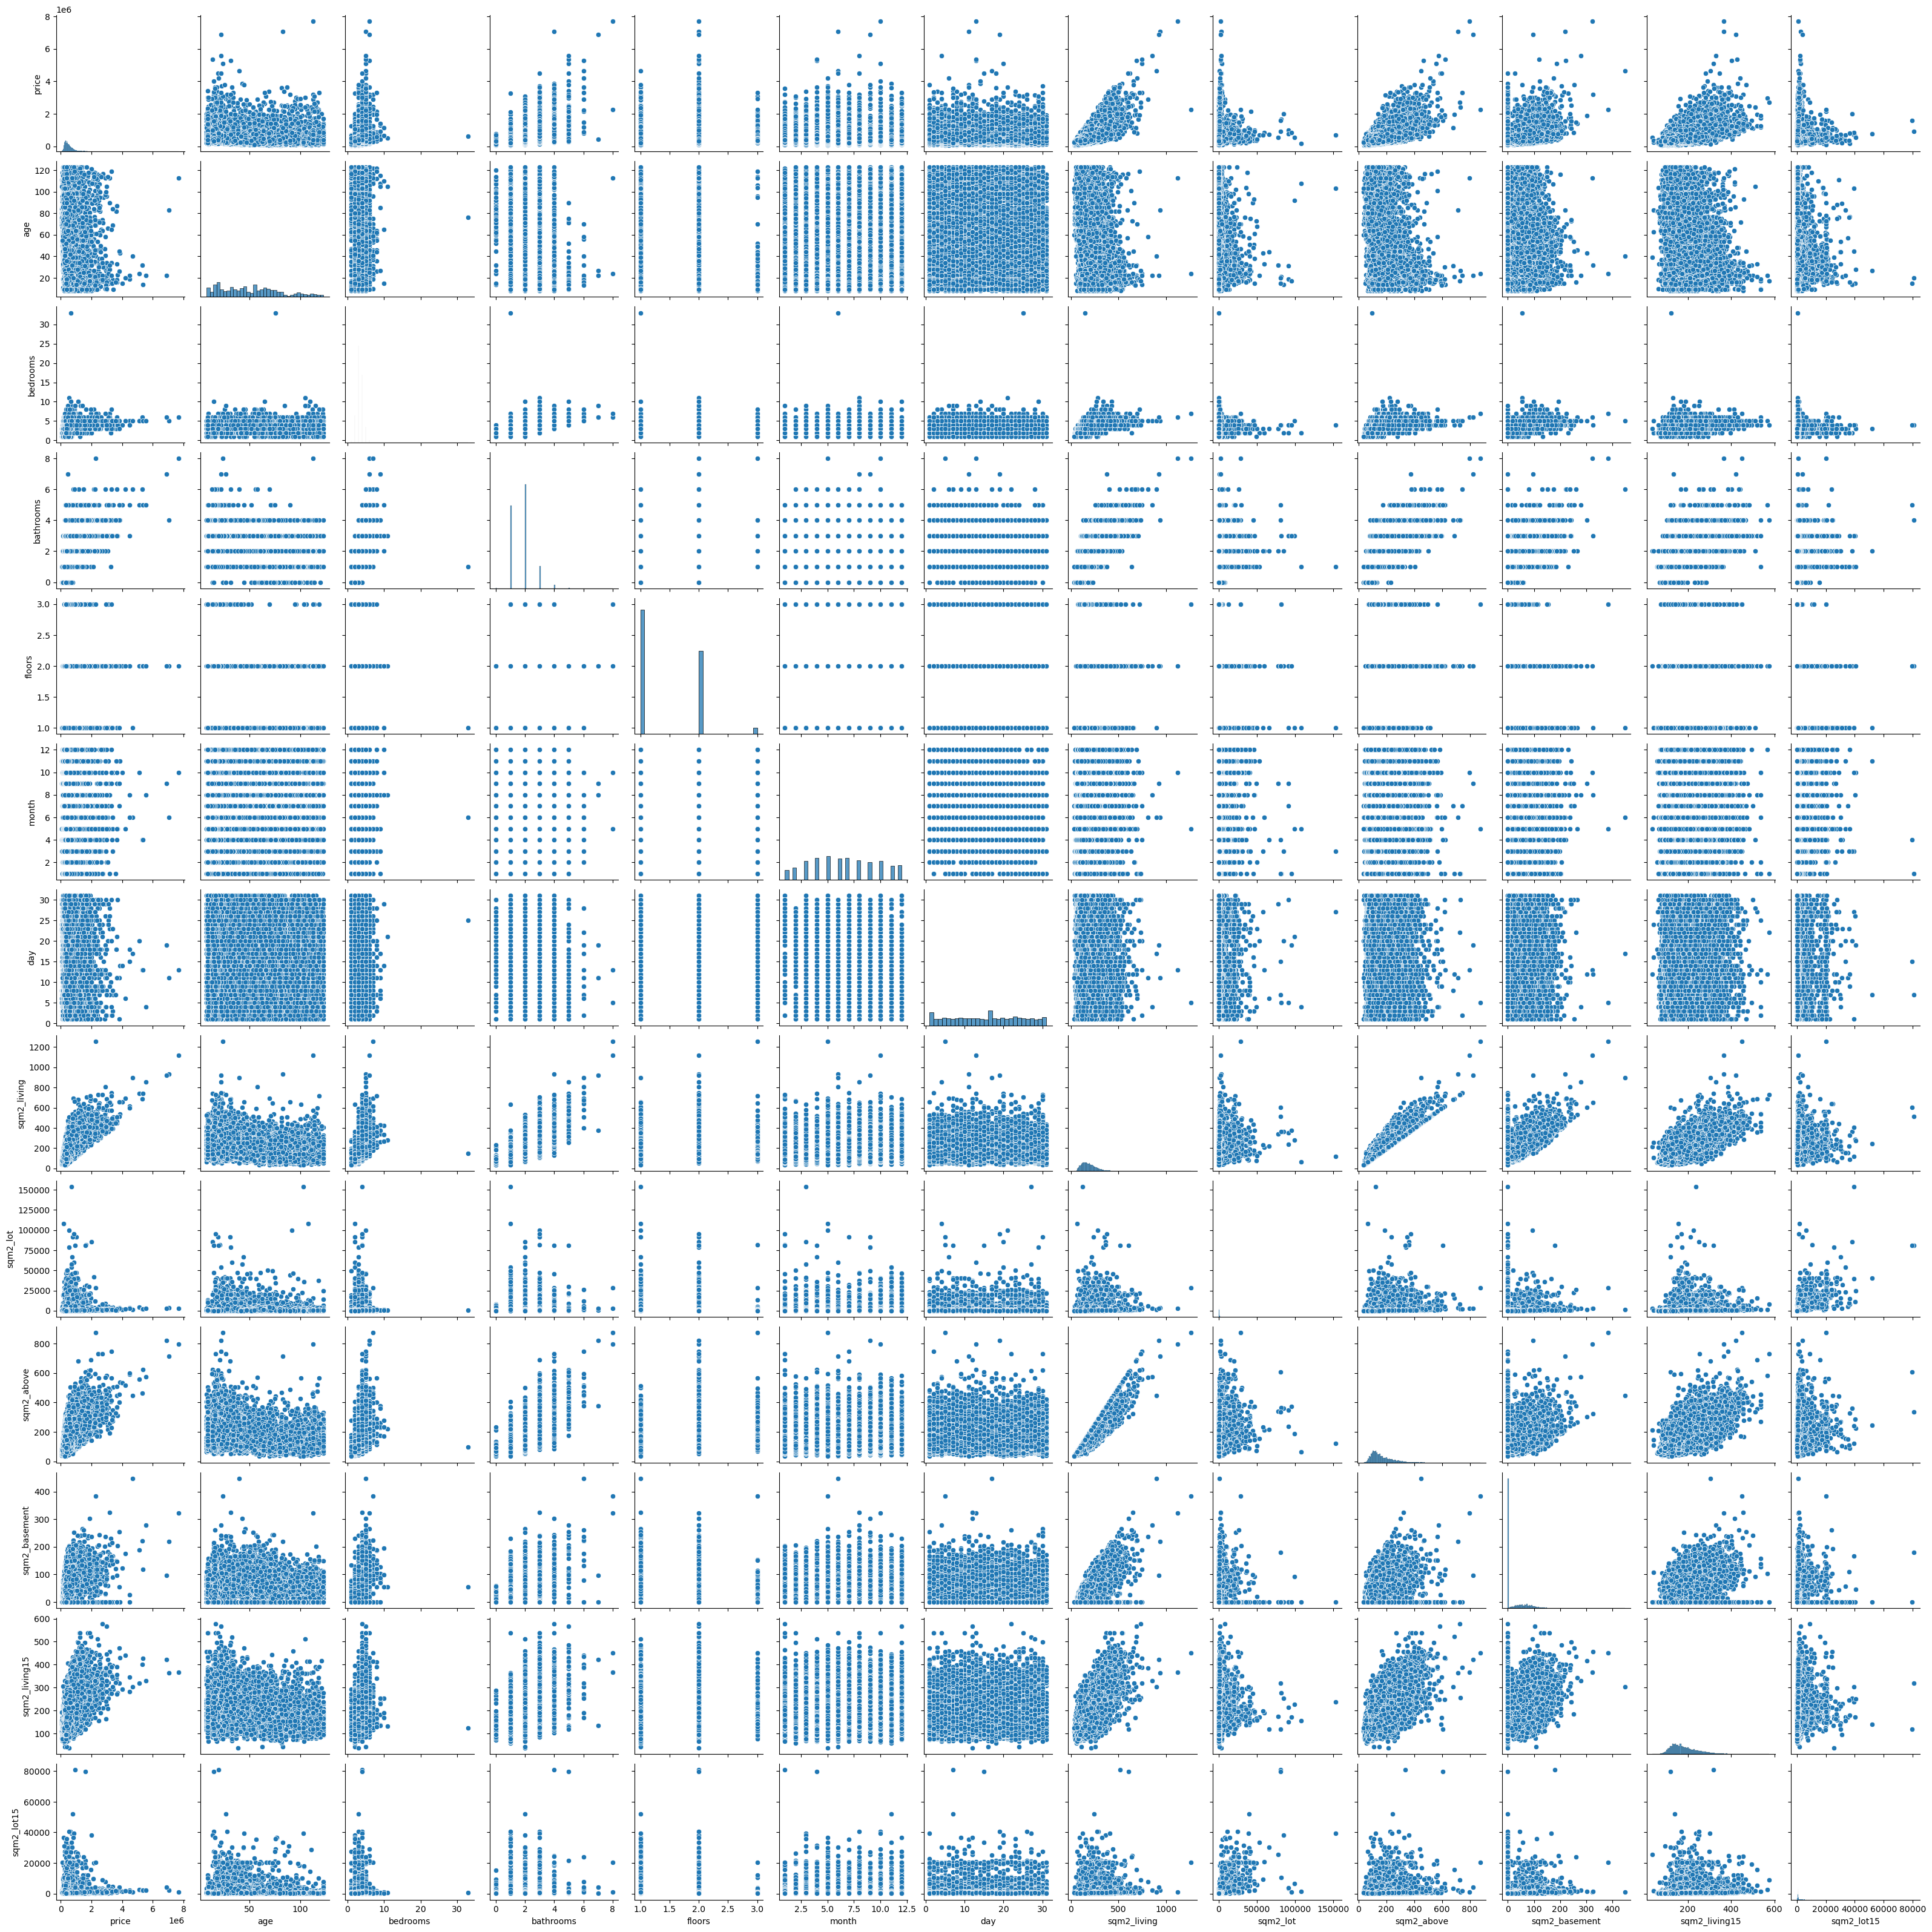

In [64]:
sns.pairplot(num_model)

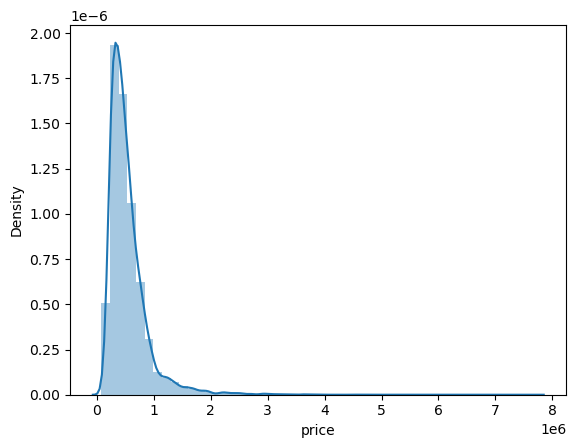

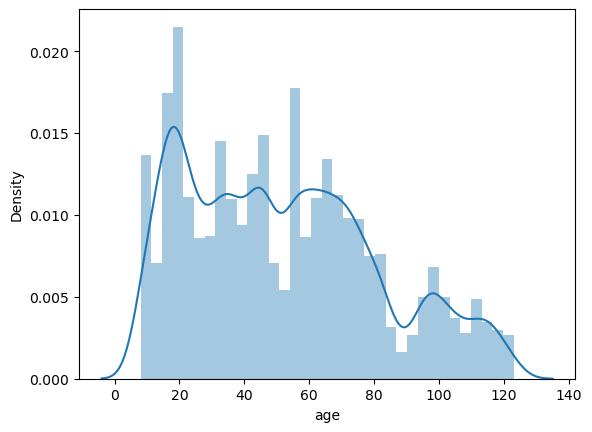

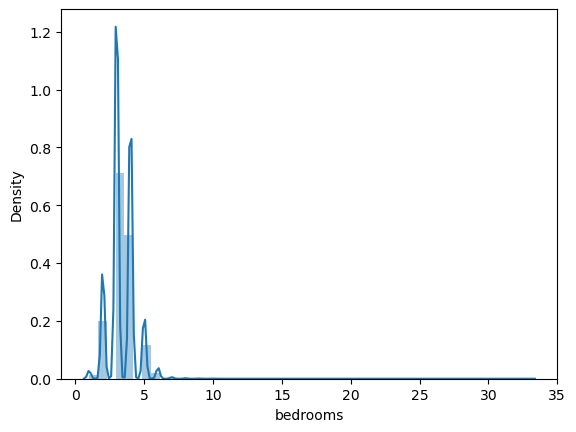

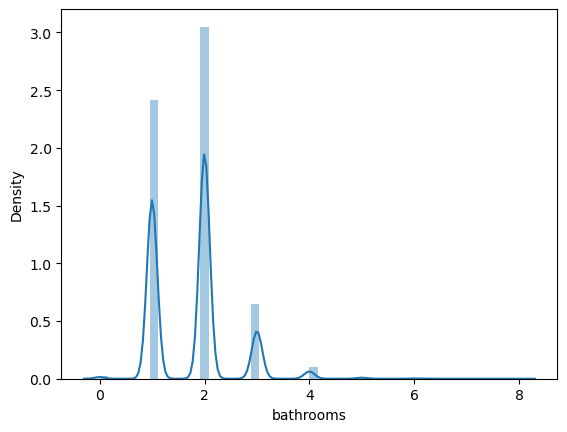

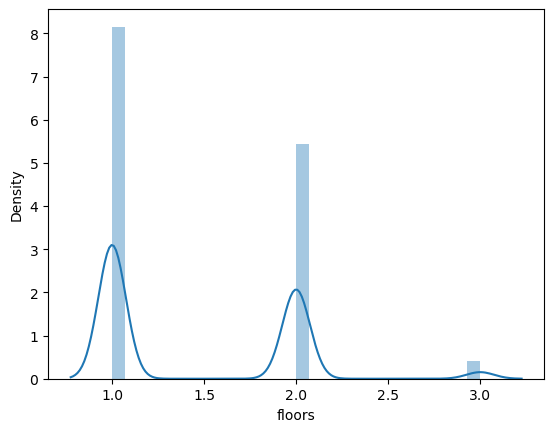

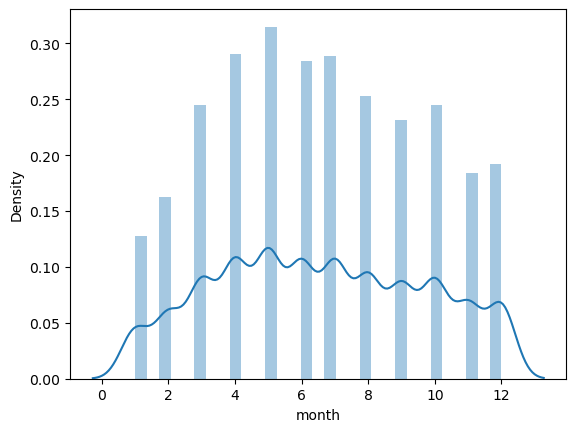

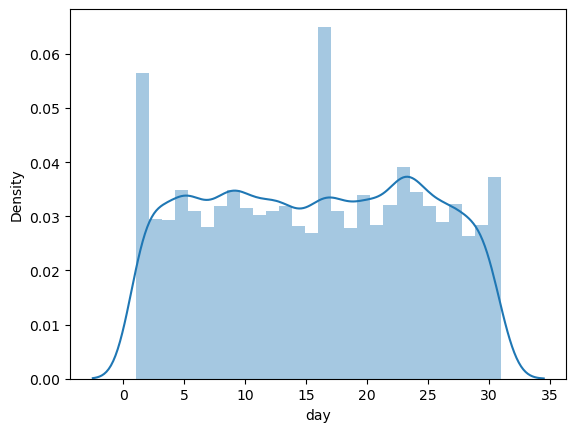

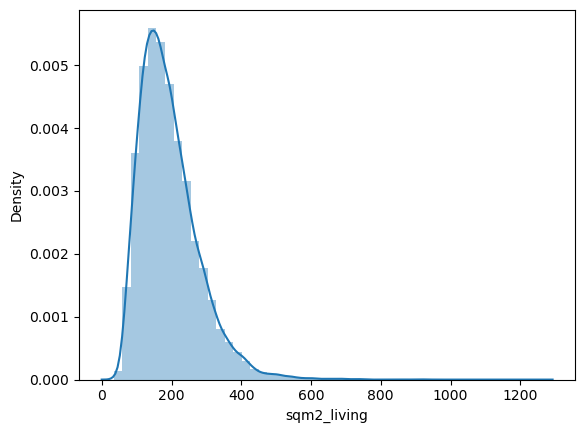

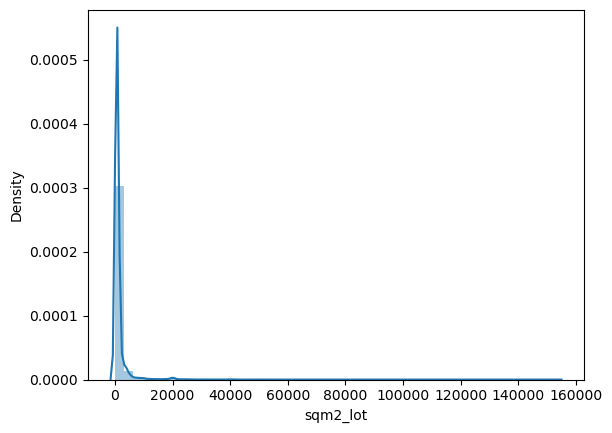

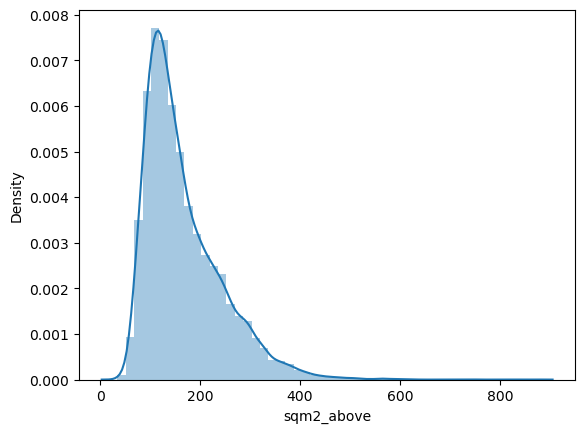

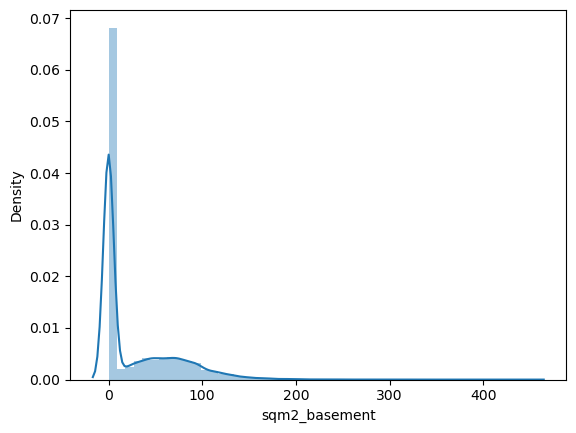

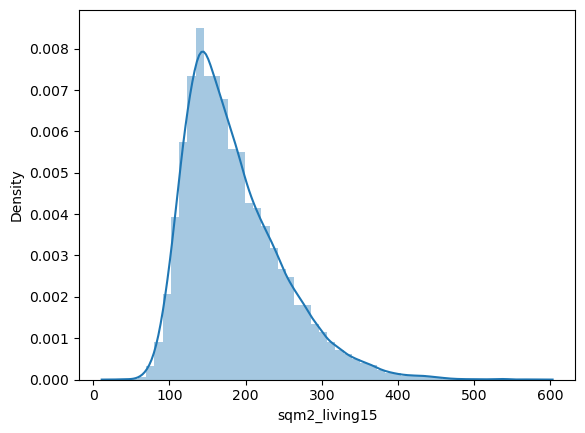

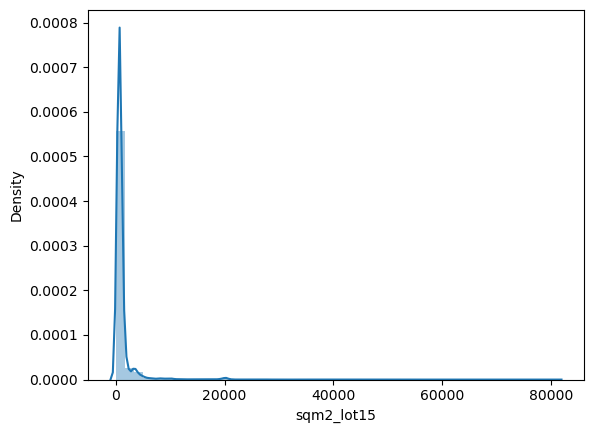

In [65]:
for column in num_model.columns:
    sns.distplot(num_model[column])
    plt.show()

In [66]:
num_model_corr = num_model.corr()
num_model_corr = round(num_model_corr,2)
num_model_corr

,price,age,bedrooms,bathrooms,floors,month,day,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
price,1.00,-0.05,0.31,0.51,0.24,-0.01,-0.01,0.70,0.09,0.61,0.32,0.59,0.08
age,-0.05,1.00,-0.16,-0.43,-0.58,0.01,0.01,-0.32,-0.05,-0.42,0.13,-0.33,-0.07
bedrooms,0.31,-0.16,1.00,0.47,0.16,-0.00,-0.01,0.58,0.03,0.48,0.30,0.39,0.03
bathrooms,0.51,-0.43,0.47,1.00,0.49,0.00,0.00,0.70,0.09,0.64,0.25,0.51,0.08
floors,0.24,-0.58,0.16,0.49,1.00,0.01,-0.01,0.35,-0.01,0.52,-0.24,0.30,-0.01
month,-0.01,0.01,-0.00,0.00,0.01,1.00,-0.06,0.01,-0.00,0.01,0.01,0.00,0.00
day,-0.01,0.01,-0.01,0.00,-0.01,-0.06,1.00,-0.01,0.00,-0.00,-0.01,-0.01,-0.00
sqm2_living,0.70,-0.32,0.58,0.70,0.35,0.01,-0.01,1.00,0.17,0.88,0.44,0.76,0.18
sqm2_lot,0.09,-0.05,0.03,0.09,-0.01,-0.00,0.00,0.17,1.00,0.18,0.02,0.14,0.72
sqm2_above,0.61,-0.42,0.48,0.64,0.52,0.01,-0.00,0.88,0.18,1.00,-0.05,0.73,0.20


<Figure size 1000x1000 with 0 Axes>

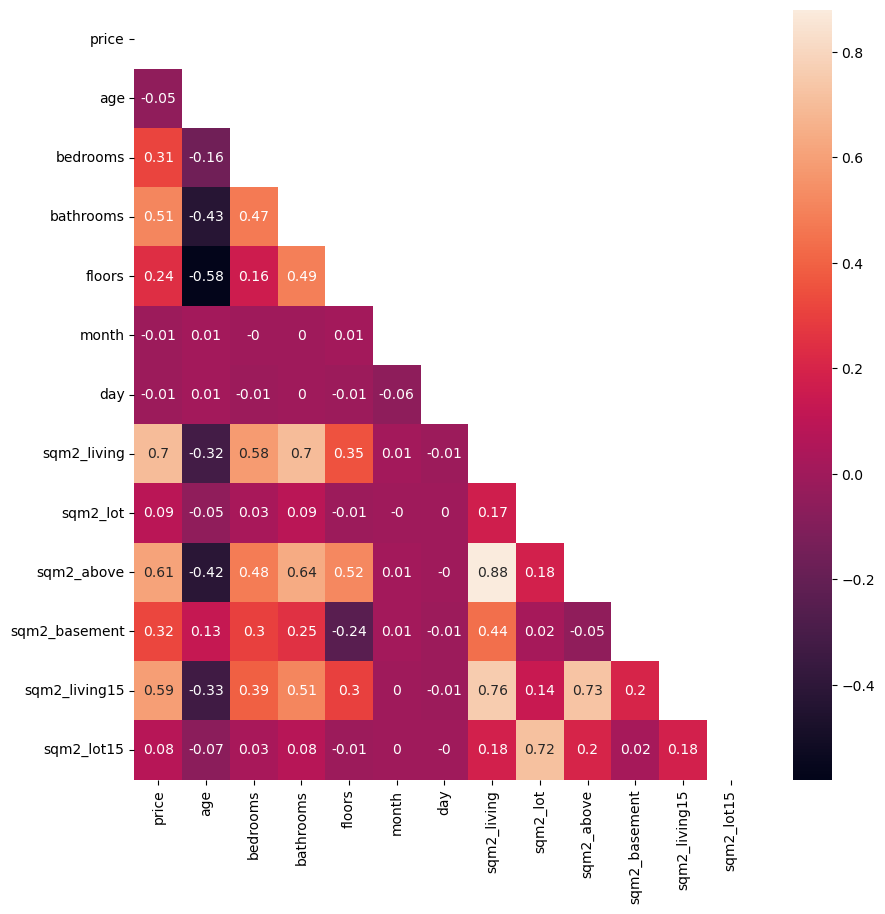

In [67]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_model_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(num_model_corr, mask=mask, annot=True)
plt.show()

In [68]:
num_model = num_model.drop(["sqm2_above"], axis = 1)
num_model.head()

,price,age,bedrooms,bathrooms,floors,month,day,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15
0,221900,68,3,1,1,10,13,109.6,524.9,0.0,124.5,524.9
1,538000,72,3,2,2,12,9,238.8,672.8,37.2,157.0,709.7
2,180000,90,2,1,1,2,25,71.5,929.0,0.0,252.7,749.0
3,604000,58,4,3,1,12,9,182.1,464.5,84.5,126.3,464.5
4,510000,36,3,2,1,2,18,156.1,750.7,0.0,167.2,697.0


In [69]:
num_model_corr = num_model.corr()
num_model_corr = round(num_model_corr,2)
num_model_corr

,price,age,bedrooms,bathrooms,floors,month,day,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15
price,1.00,-0.05,0.31,0.51,0.24,-0.01,-0.01,0.70,0.09,0.32,0.59,0.08
age,-0.05,1.00,-0.16,-0.43,-0.58,0.01,0.01,-0.32,-0.05,0.13,-0.33,-0.07
bedrooms,0.31,-0.16,1.00,0.47,0.16,-0.00,-0.01,0.58,0.03,0.30,0.39,0.03
bathrooms,0.51,-0.43,0.47,1.00,0.49,0.00,0.00,0.70,0.09,0.25,0.51,0.08
floors,0.24,-0.58,0.16,0.49,1.00,0.01,-0.01,0.35,-0.01,-0.24,0.30,-0.01
month,-0.01,0.01,-0.00,0.00,0.01,1.00,-0.06,0.01,-0.00,0.01,0.00,0.00
day,-0.01,0.01,-0.01,0.00,-0.01,-0.06,1.00,-0.01,0.00,-0.01,-0.01,-0.00
sqm2_living,0.70,-0.32,0.58,0.70,0.35,0.01,-0.01,1.00,0.17,0.44,0.76,0.18
sqm2_lot,0.09,-0.05,0.03,0.09,-0.01,-0.00,0.00,0.17,1.00,0.02,0.14,0.72
sqm2_basement,0.32,0.13,0.30,0.25,-0.24,0.01,-0.01,0.44,0.02,1.00,0.20,0.02


<Figure size 1000x1000 with 0 Axes>

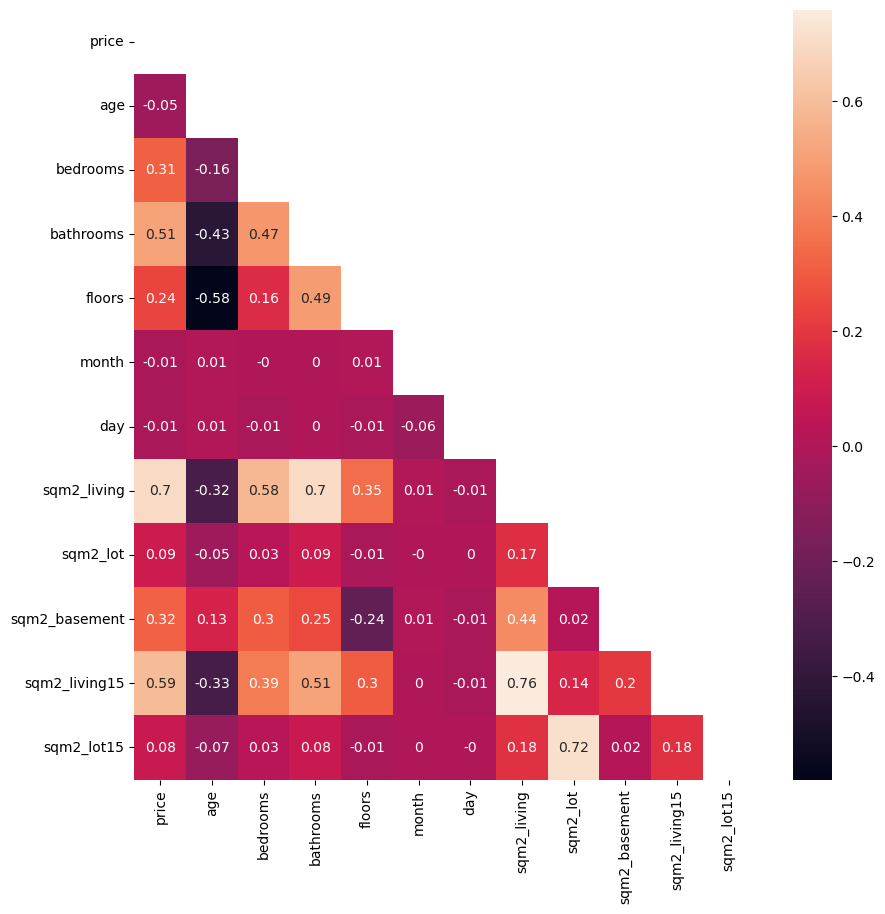

In [70]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_model_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(num_model_corr, mask=mask, annot=True)
plt.show()

In [71]:
disc_num

,bedrooms,bathrooms,floors,month,day,age
0,3,1,1,10,13,68
1,3,2,2,12,9,72
2,2,1,1,2,25,90
3,4,3,1,12,9,58
4,3,2,1,2,18,36
...,...,...,...,...,...,...
21592,3,2,3,5,21,14
21593,4,2,2,2,23,9
21594,2,0,2,6,23,14
21595,3,2,2,1,16,19


In [72]:
cont_num = cont_num.drop(["price", "sqm2_above"], axis = 1)
cont_num

,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15
0,109.6,524.9,0.0,124.5,524.9
1,238.8,672.8,37.2,157.0,709.7
2,71.5,929.0,0.0,252.7,749.0
3,182.1,464.5,84.5,126.3,464.5
4,156.1,750.7,0.0,167.2,697.0
...,...,...,...,...,...
21592,142.1,105.1,0.0,142.1,140.2
21593,214.6,540.0,0.0,170.0,668.9
21594,94.8,125.4,0.0,94.8,186.5
21595,148.6,221.9,0.0,131.0,119.6


In [73]:
transformer = MinMaxScaler().fit(cont_num) 
x_minmax = transformer.transform(cont_num) 
print(x_minmax.shape)

(21597, 5)


In [74]:
cont_norm = pd.DataFrame(x_minmax,index = cont_num.index, columns=cont_num.columns)
cont_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqm2_living    21597 non-null  float64
 1   sqm2_lot       21597 non-null  float64
 2   sqm2_basement  21597 non-null  float64
 3   sqm2_living15  21597 non-null  float64
 4   sqm2_lot15     21597 non-null  float64
dtypes: float64(5)
memory usage: 843.8 KB


In [75]:
cont_norm.head()

,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15
0,0.061463,0.003108,0.000000,0.161912,0.005742
1,0.167062,0.004072,0.083073,0.222119,0.008027
2,0.030323,0.005742,0.000000,0.399407,0.008513
3,0.120719,0.002714,0.188700,0.165246,0.004995
4,0.099469,0.004580,0.000000,0.241015,0.007870


In [76]:
model_conc = pd.concat([disc_num, cont_norm, cat_model], axis = 1)
model_conc.head()

,bedrooms,bathrooms,floors,month,day,age,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15,waterfront,condition,grade,viewed_or_not,ren_or_not,bigger_living_or_not,bigger_lot_or_not
0,3,1,1,10,13,68,0.061463,0.003108,0.000000,0.161912,0.005742,0,3,7,0,0,1,0
1,3,2,2,12,9,72,0.167062,0.004072,0.083073,0.222119,0.008027,0,3,7,0,1,0,1
2,2,1,1,2,25,90,0.030323,0.005742,0.000000,0.399407,0.008513,0,3,6,0,0,1,0
3,4,3,1,12,9,58,0.120719,0.002714,0.188700,0.165246,0.004995,0,5,7,0,0,0,0
4,3,2,1,2,18,36,0.099469,0.004580,0.000000,0.241015,0.007870,0,3,8,0,0,1,0


In [77]:
X = model_conc
y = target

In [78]:
len(model_conc)

21597

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [80]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [81]:
pred = model.predict(X_test)
pred.shape

(6480,)

In [82]:
R2 = r2_score(y_test, pred)
adj_r2 = (1 - (1 - R2) * ((X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)))
RMSE = mean_squared_error(y_test, pred, squared=False)
MSE = mean_squared_error(y_test, pred)
print("r2 = ", R2)
print("adjusted r2 = ", adj_r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.6453193550295935
adjusted r2 =  0.6450234864778526
RMSE =  227883.7489867555
MSE =  51931003052.25858


In [83]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = pred
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
7189,900000,3.596900e+05,540309.969390
2751,346950,5.270575e+05,180107.480245
17077,305000,1.949487e+05,110051.274550
15151,507000,4.672527e+05,39747.275440
985,283000,3.348600e+05,51859.999732
...,...,...,...
11524,550000,3.650036e+05,184996.426321
20461,355000,3.905104e+05,35510.362612
4102,1040000,1.199777e+06,159777.095600
3415,245000,1.919379e+05,53062.077110


In [84]:
results.sort_values('diff', ascending=False).head(10)

,true,pred,diff
9245,6890000,2.700919e+06,4.189081e+06
7245,7700000,3.545293e+06,4.154707e+06
3910,7060000,3.292455e+06,3.767545e+06
1446,5350000,2.181143e+06,3.168857e+06
19002,3800000,1.876463e+06,1.923537e+06
10435,3400000,1.539813e+06,1.860187e+06
13515,3170000,1.401720e+06,1.768280e+06
21514,3000000,1.342051e+06,1.657949e+06
7028,3800000,2.261352e+06,1.538648e+06
2972,2950000,1.468141e+06,1.481859e+06


In [85]:
sns.regplot(results['true'], results['pred'])

<AxesSubplot:xlabel='true', ylabel='pred'>

In [86]:
results.describe()

,true,pred,diff
count,6.480000e+03,6.480000e+03,6.480000e+03
mean,5.347266e+05,5.357739e+05,1.408351e+05
std,3.826733e+05,2.970454e+05,1.791687e+05
min,8.200000e+04,-1.656168e+05,4.890496e+01
25%,3.179062e+05,3.372667e+05,4.573901e+04
50%,4.450000e+05,4.708350e+05,9.814583e+04
75%,6.290000e+05,6.648745e+05,1.797743e+05
max,7.700000e+06,3.545293e+06,4.189081e+06
